In [ ]:
import numpy as np
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import random

class MyGraph:

    #1 - Adjacency List
    #2 - Adjacency Matrix
    #3 - Incidence Matrix
    #class constructor which uses one of 3 representations and fills the others
    #type1 - which type of representation is being used to create a Graph class
    def __init__(self, graph, type1):
        match type1:
            case 1:
                self.adjacencyList = graph
                self.adjacencyMatrix = MyGraph.changeRepresentation(graph, 1, 2)
                self.incidenceMatrix = MyGraph.changeRepresentation(graph, 1, 3)
            case 2:
                self.adjacencyMatrix = graph
                self.adjacencyList = MyGraph.changeRepresentation(graph, 2, 1)
                self.incidenceMatrix = MyGraph.changeRepresentation(graph, 2, 3)
            case 3:
                self.incidenceMatrix = graph
                self.adjacencyList = MyGraph.changeRepresentation(graph, 3, 1)
                self.adjacencyMatrix = MyGraph.changeRepresentation(graph, 3, 2)


    #changes one graph representation to another
    def changeRepresentation(graph1, type1, type2):
        numberOfNodes = len(graph1)
        match type1:
            case 1:
                match type2:
                    case 2:
                        #we go through values in Adjacency List and based on them we add ones in Adjacency Matrix where i and j represent the connected nodes
                        graph2 = np.zeros((numberOfNodes, numberOfNodes))
                        for i in range(numberOfNodes):
                            for j in graph1[i]:
                                graph2[i][j] = 1
                                graph2[j][i] = 1
                        return graph2
                    case 3:
                        #Create Incidence Matrix
                        numberOfEdges = int(sum([len(i) for i in graph1]) / 2)
                        graph2 = np.zeros((numberOfNodes, numberOfEdges))
                        #fill Matrix with ones
                        edgeIndex = 0
                        for i in range(numberOfNodes):
                            for j in graph1[i]:
                                if(i < j): #to avoid repetitions we choose pairs (i, j) arranged in ascending order
                                    graph2[i][edgeIndex] = 1
                                    graph2[j][edgeIndex] = 1
                                    edgeIndex += 1
                        return graph2
            case 2:
                #convert Adjacency Matrix to Adjacency List
                graph = []
                for i in range(numberOfNodes):
                    temp = []
                    for j in range(numberOfNodes):
                        #to make it faster we could just go through half of a matrix, but this one is easier to implement :)
                        if(graph1[i][j] == 1):
                            temp.append(j)
                    graph.append(temp)
                match type2:
                    case 1:
                        return graph
                    case 3:
                        #we just use the same algorithm as in case 1-3
                        numberOfEdges = int(sum([len(i) for i in graph]) / 2)
                        graph2 = np.zeros((numberOfNodes, numberOfEdges))
                        edgeIndex = 0
                        for i in range(numberOfNodes):
                            for j in graph[i]:
                                if(i < j):
                                    graph2[i][edgeIndex] = 1
                                    graph2[j][edgeIndex] = 1
                                    edgeIndex += 1
                        return graph2
            case 3:
                #to convert Incidence Matrix into Adjacency List, we first create a list with pairs which values indicate connected nodes by that edge
                graph = []
                for i in range(numberOfNodes):
                    graph.append([])
                temp = []
                for j in range(len(graph1[0])):
                    temp1 = []
                    for i in range(numberOfNodes):
                        if(graph1[i][j] == 1):
                            temp1.append(i)
                    temp.append(temp1)
                for i in temp:
                    #we check if in incidenceMatrix there were only 2 ones in each column and then create an Adjacency List
                    if(len(i) != 2):
                        print("Incorrect Incidence Matrix")
                    graph[i[0]].append(i[1])
                    graph[i[1]].append(i[0])
                match type2:
                    case 1:
                        return graph
                    case 2:
                        #we just use the same algorithm as in case 1-2
                        graph2 = np.zeros((numberOfNodes, numberOfNodes))
                        for i in range(numberOfNodes):
                            for j in graph[i]:
                                graph2[i][j] = 1
                                graph2[j][i] = 1
                        return graph2

    #Adds point ONLY TO adjacencyList
    def addPoint(self):
        self.adjacencyList.append([])

    #Adds wedge ONLY TO adjacencyList
    def addWedge(self,edge):
        self.adjacencyList[edge[0]].append(edge[1])
        self.adjacencyList[edge[1]].append(edge[0])

    #Generates random graph with n nodes and l edges
    def getRandomGraphNL(n,l):

        #generate all passible edges
        possible_edges = []
        for i in range(n):
            for j in range(i+1,n):
                possible_edges.append([i,j])

        #get l edges for array
        edges = random.sample(possible_edges, l)

        #Create graph by adding n nodes and l edges
        G = MyGraph([],1)
        for i in range(n):
            G.addPoint()
        for edge in edges:
            G.addWedge(edge)

        #Add othrer representations to the graph
        G.adjacencyMatrix = MyGraph.changeRepresentation(G.adjacencyList, 1, 2)
        G.incidenceMatrix = MyGraph.changeRepresentation(G.adjacencyList, 1, 3)

        return G

    #Generates random graph with n nodes and p is propability of each edge beeing present
    def getRandomGraphNP(n,p):

        #iterate over all possible edges and add them to edge table if rondom int is bigger than propability
        edges = []
        for i in range(n):
            for j in range(i+1,n):
                random_float = random.random()
                if p>=random_float:
                    edges.append([i,j])

        #Create graph by adding n nodes and l edges
        G = MyGraph([],1)
        for i in range(n):
            G.addPoint()
        for edge in edges:
            G.addWedge(edge)

        #Add other representations to the graph
        G.adjacencyMatrix = MyGraph.changeRepresentation(G.adjacencyList, 1, 2)
        G.incidenceMatrix = MyGraph.changeRepresentation(G.adjacencyList, 1, 3)
        return G

    #Draws graph
    def showGraph(self):

        #get edges from adjacencyList
        edges = []
        for i in range(len(self.adjacencyList)):
            for j in self.adjacencyList[i]:
                if(i < j):
                    edges.append((i, j))

        #construct networkx graph
        G = nx.Graph()
        for i in range(len(self.adjacencyList)):
            G.add_node(i)
        for i in range(len(self.adjacencyList)):
            for neighbor in self.adjacencyList[i]:
                G.add_edge(i, neighbor)

        #set layout and draw graph with specified parameters
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=400, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
        plt.show()

    def __str__(self):
        return f"Adjacency List:\n{self.adjacencyList}\n\nAdjacency Matrix:\n{self.adjacencyMatrix}\n\nIncidence Matrix:\n{self.incidenceMatrix}\n"

In [ ]:
G = MyGraph.getRandomGraphNL(6,6)
print(G)
G.showGraph()

In [ ]:
B = MyGraph.getRandomGraphNP(6,0.2)
print(B)
B.showGraph()

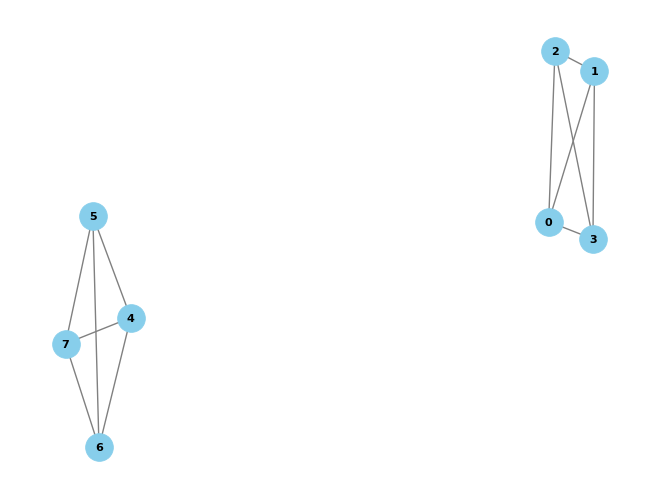

In [72]:
# Napisać program do generowania losowych grafów k-regularnych.
# Graf k-regularny – graf, którego każdy wierzchołek ma stopień równy k.
# może być niespójny
# wejście: liczba wierzchołków n, stopień k
# sprawdzamy czy n > k 
# jeżeli k nieparzyste to n musi być parzyste

# wyjście: obiekt grafu MyGraph z powyższej komórki kodu

def generate_k_regular_graph(n, k):
    if n <= k:
        print("n must be greater than k")
        return None
    if k % 2 != 0 and n % 2 != 0:
        print("n must be even")
        return None
    
    # ciąg stopni wierzchołków
    degree_sequence = [[i, k] for i in range(n)] # i - wierzchołek, k - stopień wierzchołka
    adj_list = [ [] for i in degree_sequence]

    while True:
        # sprawdzamy czy w degree_sequence stopnie wierzchołków są równe k
        if all(i[1] == 0 for i in degree_sequence):
            break
        for i in range(1, degree_sequence[0][1] + 1):
            degree_sequence[i][1] -= 1
            # dodajemy krawędź między wierzchołkami a i b
            a = degree_sequence[0][0]
            b = degree_sequence[i][0]
            adj_list[a].append(b)    
            adj_list[b].append(a)        

        degree_sequence[0][1] = 0
        
        degree_sequence.sort(reverse=True, key=lambda x: x[1])

    return MyGraph(adj_list, 1)    
generate_k_regular_graph(8, 3) .showGraph()